In [1]:
import pandas as pd
import re
import string

In [2]:
data_new = pd.read_csv('/content/Complete_merged.csv', encoding= 'ISO-8859–1')
print(len(data_new), 'tweets')
data_new.head()

90559 tweets


,location,text,hashtags
0,NaN,russian artillery entered a battle with McDona...,[]
1,Delhi,Shades of grey #War #MausMusings #Kharkiv #Ukr...,"['War', 'MausMusings', 'Kharkiv', 'Ukraine']"
2,NaN,1.) You are embedded with the âKrakenâ win...,[]
3,NaN,"In Kharkiv, after shelling in Saltivka, two hi...",[]
4,Newyork,The activities carried out by the United State...,"['ETH', 'France', 'BSC']"


In [3]:
data = data_new[['text']]

data.head()

,text
0,russian artillery entered a battle with McDona...
1,Shades of grey #War #MausMusings #Kharkiv #Ukr...
2,1.) You are embedded with the âKrakenâ win...
3,"In Kharkiv, after shelling in Saltivka, two hi..."
4,The activities carried out by the United State...


In [4]:
import warnings

warnings.filterwarnings('ignore')

import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time



data['preprocess_data'] = data['text'].str.lower()

#url removed
data['preprocess_data'] = data['preprocess_data'].str.replace(r'(https|http)?:\/(\w|\.|\/|\?|\=|\&|\%)*\b','')
data['preprocess_data'] = data['preprocess_data'].str.replace(r'www\.\S+\.com','')

#removed retweets & cc
data['preprocess_data'] = data['preprocess_data'].str.replace(r'rt|cc', '')

#hashtags removed
data['preprocess_data'] = data['preprocess_data'].str.replace(r'#\S+', '')

#user mentioned removed
data['preprocess_data'] = data['preprocess_data'].str.replace(r'@\S+', '')

#emoji removed
data['preprocess_data'] = data['preprocess_data'].str.replace(r'[^\x00-\x7F]+', '')

#html tags
data['preprocess_data'] = data['preprocess_data'].str.replace(r'<.*?>', '')

#removed extra spaces
data['preprocess_data'] = data['preprocess_data'].str.replace(r' +', ' ')

#punctuation replaced
data['preprocess_data'] = data['preprocess_data'].str.replace('[{}]'.format(string.punctuation), '')

data['preprocess_data'] = data['preprocess_data'].fillna('')

data['preprocess_data'] = data['preprocess_data'].str.replace('\n', '') 



In [5]:
tweets_df=data.loc[:,['preprocess_data']]
tweets_df.info()
tweets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90559 entries, 0 to 90558
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   preprocess_data  90559 non-null  object
dtypes: object(1)
memory usage: 707.6+ KB


,preprocess_data
0,russian aillery entered a battle with mcdonald...
1,shades of grey
2,1 you are embedded with the kraken wing of azo...
3,in kharkiv after shelling in saltivka two high...
4,the activities carried out by the united state...


In [6]:
tweets_df['preprocess_data']

0        russian aillery entered a battle with mcdonald...
1                                          shades of grey 
2        1 you are embedded with the kraken wing of azo...
3        in kharkiv after shelling in saltivka two high...
4        the activities carried out by the united state...
                               ...                        
90554    i think if the war stas now it will never stop...
90555                         no attack on usa yet boring 
90556               some jokers plus idiots trying to sta 
90557     one nostradamus passage in paicular could for...
90558        i think there will be over the next 10 years 
Name: preprocess_data, Length: 90559, dtype: object

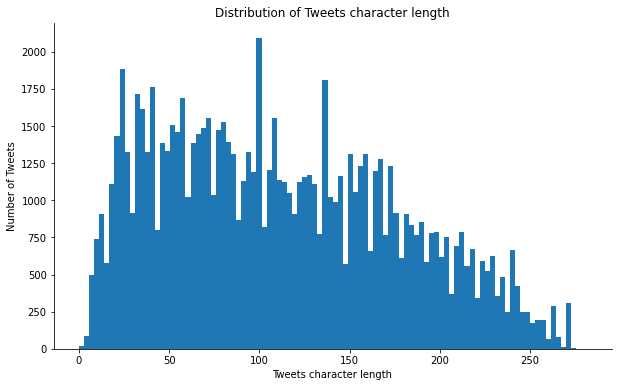

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in tweets_df.preprocess_data]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
#With English stop words
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop = list(stopwords.words('english')) 
vectorizer = CountVectorizer(
analyzer='word',       
min_df=100,# minimum required occurences of a word  
stop_words = stop,# remove stop words
lowercase=True,# convert all words to lowercase
token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
max_features=5000,# max number of unique words
                            )
data_matrix = vectorizer.fit_transform(tweets_df.preprocess_data)
data_matrix

<90559x1709 sparse matrix of type '<class 'numpy.int64'>'
	with 675675 stored elements in Compressed Sparse Row format>

In [14]:
for i in range(2,10):
  print("no of topics:", i)
  lda_model = LatentDirichletAllocation(
  n_components= i, # Number of topics
  random_state= 20,       
  n_jobs = -1  # Use all available CPUs 
  )
  lda_output = lda_model.fit_transform(data_matrix)
  lda_perplexity = lda_model.perplexity(data_matrix)
  print("perplexity:" , lda_perplexity )
 



no of topics: 2
perplexity: 836.2569354181286
no of topics: 3
perplexity: 791.0310368273067
no of topics: 4
perplexity: 792.7650373043157
no of topics: 5
perplexity: 787.1618916088361
no of topics: 6
perplexity: 763.5901350937065
no of topics: 7
perplexity: 760.7939031352636
no of topics: 8
perplexity: 756.2526582666521
no of topics: 9
perplexity: 753.632401594328


In [11]:
print(lda_perplexity)

787.1618916088361


In [18]:
#With English stop words + russia + ukraine
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop = list(stopwords.words('english')) + ['ukraine' , 'russia']
vectorizer = CountVectorizer(
analyzer='word',       
min_df=100,# minimum required occurences of a word  
stop_words = stop,# remove stop words
lowercase=True,# convert all words to lowercase
token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
max_features=5000,# max number of unique words
                            )
data_matrix_2 = vectorizer.fit_transform(tweets_df.preprocess_data)
data_matrix_2

<90559x1707 sparse matrix of type '<class 'numpy.int64'>'
	with 649455 stored elements in Compressed Sparse Row format>

In [19]:
for i in range(2,10):
  print("no of topics:", i)
  lda_model = LatentDirichletAllocation(
  n_components= i, # Number of topics
  random_state= 20,       
  n_jobs = -1  # Use all available CPUs 
  )
  lda_output = lda_model.fit_transform(data_matrix_2)
  lda_perplexity = lda_model.perplexity(data_matrix_2)
  print("perplexity:" , lda_perplexity )

no of topics: 2
perplexity: 906.0851576562045
no of topics: 3
perplexity: 887.3625818678144
no of topics: 4
perplexity: 888.6168281220688
no of topics: 5
perplexity: 843.8602131740602
no of topics: 6
perplexity: 833.5692121710468
no of topics: 7
perplexity: 837.846450293956
no of topics: 8
perplexity: 820.1508751681538
no of topics: 9
perplexity: 817.1970186663052


In [20]:
lda_model = LatentDirichletAllocation(
  n_components= 6, # Number of topics
  random_state= 20,       
  n_jobs = -1  # Use all available CPUs 
  )

lda_output = lda_model.fit_transform(data_matrix)

In [24]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
#vectoriser with english stopwords only
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1       1.465019 -47.625065       1        1  27.093087
4      54.854797 -36.476795       2        1  18.141431
2      32.212929 -61.444572       3        1  16.254565
0       5.111096 -14.110332       4        1  15.177424
3      26.350170 -33.374702       5        1  12.753642
5      38.109818  -7.222781       6        1  10.579851, topic_info=             Term          Freq         Total Category  logprob  loglift
1264      russian  17492.000000  17492.000000  Default  30.0000  30.0000
1568      ukraine  18970.000000  18970.000000  Default  29.0000  29.0000
1628          war  13838.000000  13838.000000  Default  28.0000  28.0000
1263       russia  11615.000000  11615.000000  Default  27.0000  27.0000
1427         stop   5331.000000   5331.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
411   destruction    540.272452    784.563422   Topic6  -4.9378   1.8732
1295          see    736.123980   2256.674185   Topic6  -4.6285   1.1260
1263       russia   1214.505377  11615.145859   Topic6  -4.1278  -0.0118
1568      ukraine   1305.966346  18970.608238   Topic6  -4.0552  -0.4297
1572    ukrainian    736.765352   7969.072458   Topic6  -4.6276  -0.1348

[429 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         2  0.000968       100
0         3  0.211924       100
0         4  0.089995       100
0         5  0.608677       100
0         6  0.088060       100
...     ...       ...       ...
1704      3  0.003174     youre
1705      1  0.001446  zelensky
1705      3  0.010120  zelensky
1705      4  0.981666  zelensky
1705      5  0.005783  zelensky

[822 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 1, 4, 6])

In [29]:

for i,topic in enumerate(lda_model.components_):
  print(f'Top 20 words for topic #{i}:')
  print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-20:]])
  print('\n')
 

Top 20 words for topic #0:
['defend', 'zelensky', 'smas', 'grace', 'putin', 'blog', 'russian', 'crimes', 'currently', 'amp', 'nato', 'must', 'lose', 'could', 'president', 'would', 'world', 'russia', 'war', 'ukraine']


Top 20 words for topic #1:
['get', 'want', 'ukraine', 'time', 'stand', 'country', 'good', 'know', 'putin', 'need', 'like', 'one', 'please', 'suppo', 'dont', 'help', 'world', 'people', 'war', 'amp']


Top 20 words for topic #2:
['today', 'plant', 'refugees', 'attack', 'troops', 'since', 'said', 'forces', 'russians', 'invasion', 'new', 'says', 'suppo', 'war', 'military', 'via', 'russia', 'russian', 'ukrainian', 'ukraine']


Top 20 words for topic #3:
['ukrainian', 'force', 'speaking', 'live', 'message', 'take', 'join', 'ukkkraine', 'send', 'never', 'russias', 'like', 'follow', 'news', 'sanctions', 'stop', 'people', 'russia', 'russian', 'putin']


Top 20 words for topic #4:
['protect', 'dead', 'kharkiv', 'shelling', 'kyiv', 'russians', 'people', 'destroyed', 'city', 'forces

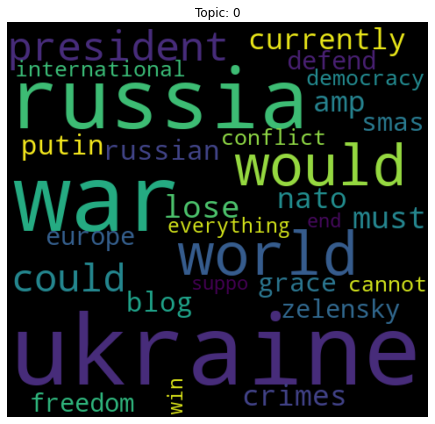

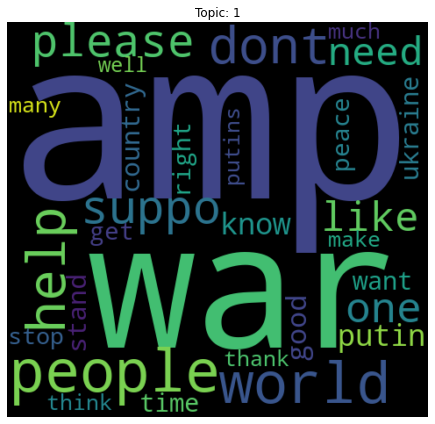

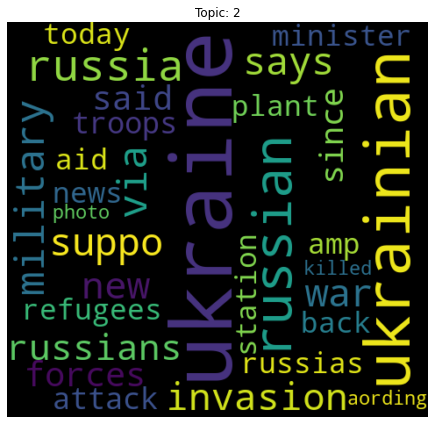

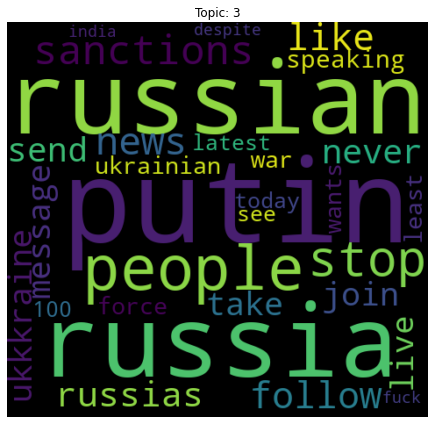

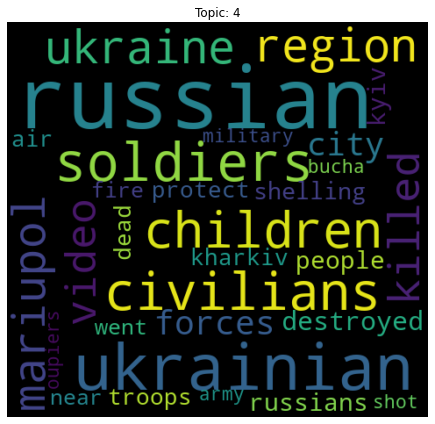

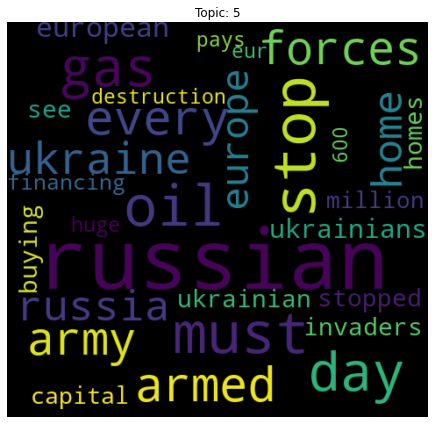

In [30]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

num_top_words=30


for topic_idx, topic in enumerate(lda_model.components_):
    # create a dataframe with two columns (word, weight) for each topic
    
    # create a word:count dictionary
    f={vectorizer.get_feature_names()[i]:topic[i] for i in topic.argsort()[::-1][0:num_top_words]}
    
    # generate wordcloud in subplots
    wordcloud = WordCloud(width=480, height=450, margin=0, background_color="black")
    wordcloud.generate_from_frequencies(frequencies=f)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("Topic: "+str(topic_idx))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [31]:
topic_values = lda_model.transform(data_matrix)
tweets_df['Topic'] = topic_values.argmax(axis=1)

In [35]:
tweets_df.head(5)

,preprocess_data,Topic
0,russian aillery entered a battle with mcdonald...,4
1,shades of grey,0
2,1 you are embedded with the kraken wing of azo...,0
3,in kharkiv after shelling in saltivka two high...,4
4,the activities carried out by the united state...,4


In [34]:
tweets_df.head()
file_name = "Topic_classification"+".csv"

tweets_df.to_csv(file_name)